In [4]:
import numpy as np
import pandas as pd
import random

In [5]:
p=0.53

In [7]:
random.random() > .53

False

In [299]:
def game_winner(p, player1= 'player A', player2= 'player B'):    
    winner_not_determined= True
    player_a_points=0
    player_b_points=0
    while winner_not_determined:
        if random.random() > p:
            player_b_points +=1
        else:
            player_a_points += 1

        check= (player_a_points>=4) | (player_b_points >= 4)

        if check:
            W = max(player_a_points , player_b_points)
            L = min(player_a_points , player_b_points)
            if (W==4) & (L < 4) :
                winner_not_determined= False
            elif (W - L) == 2:
                winner_not_determined= False

    if W == player_a_points :
        return player1
    elif W == player_b_points:
        return player2
            

In [300]:
sum(np.array([game_winner(.53)=='player A' for i in range(10000000)]))/10000000   # 56.54894% of games are won by better player

0.5652682

In [301]:
def tie_breaker(p,player1= 'player A', player2= 'player B', thre=7):
    winner_not_determined= True
    player_a_games=0
    player_b_games=0
    while winner_not_determined:
        if random.random() < p:
            player_a_games +=1
        else:
            player_b_games +=1

        check= (player_a_games >= thre) | (player_b_games >= thre) 

        if check:
            W= max(player_a_games,player_b_games)
            L= min(player_a_games,player_b_games)

            if (W==thre) & (L< thre-1):
                winner_not_determined= False
            elif (W-L) == 2:
                winner_not_determined= False
            elif (W-L) == 1:
                winner_not_determined= True

    if W == player_a_games:
        return player1
    elif W == player_b_games:
        return player2    

In [302]:
def set_winner(p,player1= 'player A', player2= 'player B'):
    winner_not_determined= True
    player_a_games=0
    player_b_games=0
    tie_break= False
    while winner_not_determined:
        if game_winner(p, player1, player2)== player1 :
            player_a_games +=1
        else:
            player_b_games +=1

        check= (player_a_games >= 6) | (player_b_games >= 6)   #ASSUMPTION: TIE BREAKER FOR ALL SETS
    


        if check:
            W= max(player_a_games,player_b_games)
            L= min(player_a_games,player_b_games)

            if (W==6) & (L< 5):
                winner_not_determined= False
            elif (W-L) == 2:
                winner_not_determined= False
            elif (W-L) == 1:
                winner_not_determined= True
            else:
                tie_break= True
                winner_not_determined= False

    if tie_break== False:
        if W == player_a_games:
            return player1
        elif W == player_b_games:
            return player2

    else:
        return tie_breaker(p)
    

In [303]:
def tie_breaker_set_winner(p,player1= 'player A', player2= 'player B'):
    winner_not_determined= True
    player_a_games=0
    player_b_games=0

    while winner_not_determined:
        if game_winner(p,player1, player2) == player1:
            player_a_games +=1
        else:
            player_b_games +=1

        check= (player_a_games >= 6) | (player_b_games >= 6)   #ASSUMPTION: TIE BREAKER FOR ALL SETS
    


        if check:
            W= max(player_a_games,player_b_games)
            L= min(player_a_games,player_b_games)

            if (W==6) & (L< 5):
                winner_not_determined= False
            elif (W-L) == 2:
                winner_not_determined= False
            elif (W-L) == 1:
                winner_not_determined= True


    if W == player_a_games:
        return player1
    elif W == player_b_games:
        return player2

    

In [304]:
set_winner(.53)

'player A'

In [305]:
sum(np.array([set_winner(.53)=='player A' for i in range(1000000)]))/1000000   # 68.19% of sets are won by better player

0.682834

In [306]:
def match_winner(p ,player1= 'player A', player2= 'player B', tog='m'):
    winner_not_determined= True
    player_a_sets=0
    player_b_sets=0
    tie_breaker= False

    if tog=='m':   # Singles
        while winner_not_determined:
            if set_winner(p,player1,player2)== player1:
                player_a_sets +=1
            else:
                player_b_sets +=1

            check = (player_a_sets >= 2) | (player_b_sets >= 2)

            if check:
                W = max(player_a_sets,player_b_sets)
                L = min(player_a_sets,player_b_sets)

                if (W==3):
                    winner_not_determined= False
                elif (W == L):
                    tie_breaker= True
                    winner_not_determined= False

        if tie_breaker:
            return tie_breaker_set_winner(p,player1, player2)

        else:
            if W == player_a_sets:
                return player1

            elif W == player_b_sets:
                return player2

    else:   # Singles
        while winner_not_determined:
            if set_winner(p,player1, player2)== player1:
                player_a_sets +=1
            else:
                player_b_sets +=1

            check = (player_a_sets >= 1) | (player_b_sets >= 1)

            if check:
                W = max(player_a_sets,player_b_sets)
                L = min(player_a_sets,player_b_sets)

                if (W==2):
                    winner_not_determined= False
                elif (W -L) == 2:
                    winner_not_determined= False

        if W == player_a_sets:
            return player1

        elif W == player_b_sets:
            return player2

In [307]:
match_winner(.53,tog='m')

'player A'

In [308]:
sum(np.array([match_winner(.53,tog='m')=='player A' for i in range(1000000)]))/1000000   # 81% of matches are won by better player male

0.813761

In [309]:
sum(np.array([match_winner(.53,tog='f')=='player A' for i in range(1000000)]))/1000000   #76.15% of matches are won by better player

0.761486

In [310]:
mens_data= []
for i in range(10000):
    mens_data.append(sum(np.array([match_winner(.53,tog='m')=='player A' for i in range(100)]))/100)
    if i%100 == 0:
        print('{} done'.format(i))

0 done
100 done
200 done
300 done
400 done
500 done
600 done
700 done
800 done
900 done
1000 done
1100 done
1200 done
1300 done
1400 done
1500 done
1600 done
1700 done
1800 done
1900 done
2000 done
2100 done
2200 done
2300 done
2400 done
2500 done
2600 done
2700 done
2800 done
2900 done
3000 done
3100 done
3200 done
3300 done
3400 done
3500 done
3600 done
3700 done
3800 done
3900 done
4000 done
4100 done
4200 done
4300 done
4400 done
4500 done
4600 done
4700 done
4800 done
4900 done
5000 done
5100 done
5200 done
5300 done
5400 done
5500 done
5600 done
5700 done
5800 done
5900 done
6000 done
6100 done
6200 done
6300 done
6400 done
6500 done
6600 done
6700 done
6800 done
6900 done
7000 done
7100 done
7200 done
7300 done
7400 done
7500 done
7600 done
7700 done
7800 done
7900 done
8000 done
8100 done
8200 done
8300 done
8400 done
8500 done
8600 done
8700 done
8800 done
8900 done
9000 done
9100 done
9200 done
9300 done
9400 done
9500 done
9600 done
9700 done
9800 done
9900 done


<AxesSubplot:>

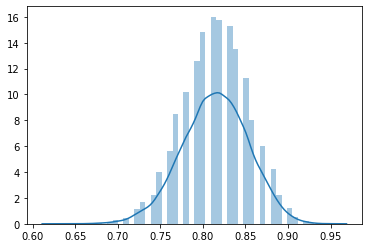

In [311]:
import seaborn as sns
sns.distplot(mens_data)

0 done
100 done
200 done
300 done
400 done
500 done
600 done
700 done
800 done
900 done
1000 done
1100 done
1200 done
1300 done
1400 done
1500 done
1600 done
1700 done
1800 done
1900 done
2000 done
2100 done
2200 done
2300 done
2400 done
2500 done
2600 done
2700 done
2800 done
2900 done
3000 done
3100 done
3200 done
3300 done
3400 done
3500 done
3600 done
3700 done
3800 done
3900 done
4000 done
4100 done
4200 done
4300 done
4400 done
4500 done
4600 done
4700 done
4800 done
4900 done
5000 done
5100 done
5200 done
5300 done
5400 done
5500 done
5600 done
5700 done
5800 done
5900 done
6000 done
6100 done
6200 done
6300 done
6400 done
6500 done
6600 done
6700 done
6800 done
6900 done
7000 done
7100 done
7200 done
7300 done
7400 done
7500 done
7600 done
7700 done
7800 done
7900 done
8000 done
8100 done
8200 done
8300 done
8400 done
8500 done
8600 done
8700 done
8800 done
8900 done
9000 done
9100 done
9200 done
9300 done
9400 done
9500 done
9600 done
9700 done
9800 done
9900 done


<AxesSubplot:>

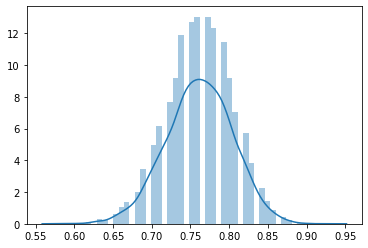

In [312]:
womens_data= []
for i in range(10000):
    womens_data.append(sum(np.array([match_winner(.53,tog='f')=='player A' for i in range(100)]))/100)
    if i%100 == 0:
        print('{} done'.format(i))
sns.distplot(womens_data)

In [313]:
np.array(mens_data).mean()

0.8143279999999999

In [314]:
np.array(womens_data).mean()

0.7613880000000001

In [315]:
# TOURNAMENT BEGINS

In [316]:
#SEEDING

In [479]:
#list1= list(range(1,65))
#list1

In [480]:
#breaklist=[2**i for i in range(1,7)]

In [319]:
#breaklist

[2, 4, 8, 16, 32, 64]

In [320]:
"""
for i,v in enumerate(list1):
    if v in breaklist:
        list1.insert(i+1,'b')
"""

In [321]:
#list1

[1,
 2,
 'b',
 3,
 4,
 'b',
 5,
 6,
 7,
 8,
 'b',
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 'b',
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 'b',
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 'b']

In [364]:
"""
big_chunck=[]
small_chunck=[]
for v in list1:
    if v != 'b':
        small_chunck.append(v)
    else:
        big_chunck.append(small_chunck)
        small_chunck=[]
 """   

In [365]:
#big_chunck

[[1, 2],
 [3, 4],
 [5, 6, 7, 8],
 [9, 10, 11, 12, 13, 14, 15, 16],
 [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
 [33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64]]

In [366]:
"""
L=[]
R=[]

for lists in big_chunck:
    n= len(lists)
    a= int(n/2)
    if a>1:
        subset_L= random.sample(lists, a)
        subset_R= list(set(lists) - set(subset_L))
        L = L + subset_L
        R = R + subset_R   
    else:
        subset_L= [random.choice(lists)]
        subset_R= list(set(lists) - set(subset_L))
        L = L + subset_L
        R = R + subset_R  
        """

In [367]:
#L.sort()
#R.sort()

In [368]:
#L,R

([1,
  3,
  7,
  8,
  12,
  13,
  15,
  16,
  17,
  18,
  24,
  26,
  27,
  28,
  30,
  32,
  33,
  34,
  39,
  40,
  44,
  45,
  48,
  49,
  50,
  51,
  52,
  56,
  57,
  58,
  59,
  62],
 [2,
  4,
  5,
  6,
  9,
  10,
  11,
  14,
  19,
  20,
  21,
  22,
  23,
  25,
  29,
  31,
  35,
  36,
  37,
  38,
  41,
  42,
  43,
  46,
  47,
  53,
  54,
  55,
  60,
  61,
  63,
  64])

In [369]:
"""
def pairs(lis):
    l= lis.copy()
    k=[]
    while len(l) > 0:
        pair=[l[0],l[-1]]
        l= l[1:-1]
        k.append(pair)
    return k
    """

In [370]:
#L_matchup= pairs(L)
#R_matchup= pairs(R)

In [371]:
"""
while len(L_matchup)!=1:
    L_matchup=pairs(L_matchup)
    R_matchup=pairs(R_matchup)
    """

In [372]:
#matchup=[L_matchup,R_matchup]

In [373]:
#matchup

[[[[[[[1, 62], [32, 33]], [[16, 50], [17, 49]]],
    [[[8, 57], [27, 40]], [[12, 56], [26, 44]]]],
   [[[[3, 59], [30, 34]], [[15, 51], [18, 48]]],
    [[[7, 58], [28, 39]], [[13, 52], [24, 45]]]]]],
 [[[[[[2, 64], [31, 35]], [[14, 47], [19, 46]]],
    [[[6, 60], [23, 38]], [[9, 55], [22, 41]]]],
   [[[[4, 63], [29, 36]], [[11, 53], [20, 43]]],
    [[[5, 61], [25, 37]], [[10, 54], [21, 42]]]]]]]

In [374]:
"""
scores = list(np.random.normal(50, 10, 1000))
scores.sort(reverse= True)
scores = scores[0:64]
players= [i for i in range(1,65)]
players_dataframe=pd.DataFrame(data= {'Players': players, 'Scores': scores})
"""

In [375]:
#scores = scores[0:64]

In [376]:
#len(scores)

64

In [377]:
#players= [i for i in range(1,65)]

In [378]:
#players_dataframe=pd.DataFrame(data= {'Players': players, 'Scores': scores})

In [379]:
#players_dataframe

,Players,Scores
0,1,80.148550
1,2,78.534776
2,3,77.311244
3,4,75.936566
4,5,75.759222
...,...,...
59,60,65.443660
60,61,65.188647
61,62,65.090682
62,63,64.880166


In [380]:
#matches_L= pairs(L)
#matches_R= pairs(R)

In [381]:
#matches= matches_L + matches_R

In [382]:
#matches

[[1, 62],
 [3, 59],
 [7, 58],
 [8, 57],
 [12, 56],
 [13, 52],
 [15, 51],
 [16, 50],
 [17, 49],
 [18, 48],
 [24, 45],
 [26, 44],
 [27, 40],
 [28, 39],
 [30, 34],
 [32, 33],
 [2, 64],
 [4, 63],
 [5, 61],
 [6, 60],
 [9, 55],
 [10, 54],
 [11, 53],
 [14, 47],
 [19, 46],
 [20, 43],
 [21, 42],
 [22, 41],
 [23, 38],
 [25, 37],
 [29, 36],
 [31, 35]]

In [383]:
"""
prob=[]
for match in matches:
    score1= players_dataframe.loc[players_dataframe.Players == match[0]].Scores.iloc[0]
    score2= players_dataframe.loc[players_dataframe.Players == match[1]].Scores.iloc[0]
    p1= score1 ** 1.5/ (score1 ** 1.5 + score2 ** 1.5)
    p= max(p1, 1-p1)
    prob.append(p)
    """

In [384]:
#match_dataframe=pd.DataFrame(data={'matches': matches, 'p': prob })

In [385]:
"""
winner=[]
for i,p in enumerate(prob):
    a= match_winner(p, min(matches[i]), max(matches[i]), 'm')
    winner.append(a)
    """

In [386]:
#match_dataframe['winner']=winner

In [387]:
#match_dataframe

,matches,p,winner
0,"[1, 62]",0.577410,1
1,"[3, 59]",0.561657,3
2,"[7, 58]",0.549153,7
3,"[8, 57]",0.545168,8
4,"[12, 56]",0.535787,12
5,"[13, 52]",0.533525,13
6,"[15, 51]",0.528434,15
7,"[16, 50]",0.526818,16
8,"[17, 49]",0.525054,49
9,"[18, 48]",0.523933,48


In [388]:
#L= match_dataframe.winner[0:16].tolist()
#R= match_dataframe.winner[16:].tolist()

In [389]:
"""
l_matches= pairs(L)
r_matches= pairs(R)
matches= l_matches + r_matches
"""

In [390]:
"""
prob=[]
for match in matches:
    score1= players_dataframe.loc[players_dataframe.Players == match[0]].Scores.iloc[0]
    score2= players_dataframe.loc[players_dataframe.Players == match[1]].Scores.iloc[0]
    p1= score1 ** 1.5/ (score1 ** 1.5 + score2 ** 1.5)
    p= max(p1, 1-p1)
    prob.append(p)
    """

In [391]:
"""
winner=[]
for i,p in enumerate(prob):
    a= match_winner(p, min(matches[i]), max(matches[i]), 'm')
    winner.append(a)
    """

In [392]:
#match_dataframe=pd.DataFrame(data={'matches': matches, 'p': prob, 'winner': winner })

In [393]:
"""
L= match_dataframe.winner[0:8].tolist()
R= match_dataframe.winner[8:].tolist()
l_matches= pairs(L)
r_matches= pairs(R)
matches= l_matches + r_matches
prob=[]
for match in matches:
    score1= players_dataframe.loc[players_dataframe.Players == match[0]].Scores.iloc[0]
    score2= players_dataframe.loc[players_dataframe.Players == match[1]].Scores.iloc[0]
    p1= score1 ** 1.5/ (score1 ** 1.5 + score2 ** 1.5)
    p= max(p1, 1-p1)
    prob.append(p)
winner=[]
for i,p in enumerate(prob):
    a= match_winner(p, min(matches[i]), max(matches[i]), 'm')
    winner.append(a)
match_dataframe=pd.DataFrame(data={'matches': matches, 'p': prob, 'winner': winner })
"""

In [394]:
#match_dataframe

,matches,p,winner
0,"[1, 16]",0.544061,1
1,"[3, 15]",0.529926,3
2,"[7, 13]",0.513019,7
3,"[40, 12]",0.523121,12
4,"[2, 19]",0.537805,2
5,"[4, 11]",0.515358,4
6,"[5, 10]",0.510205,10
7,"[6, 9]",0.508781,9


In [395]:
"""
L= match_dataframe.winner[0:4].tolist()
R= match_dataframe.winner[4:].tolist()
l_matches= pairs(L)
r_matches= pairs(R)
matches= l_matches + r_matches
prob=[]
for match in matches:
    score1= players_dataframe.loc[players_dataframe.Players == match[0]].Scores.iloc[0]
    score2= players_dataframe.loc[players_dataframe.Players == match[1]].Scores.iloc[0]
    p1= score1 ** 1.5/ (score1 ** 1.5 + score2 ** 1.5)
    p= max(p1, 1-p1)
    prob.append(p)
winner=[]
for i,p in enumerate(prob):
    a= match_winner(p, min(matches[i]), max(matches[i]), 'm')
    winner.append(a)
match_dataframe=pd.DataFrame(data={'matches': matches, 'p': prob, 'winner': winner })
"""

In [396]:
#match_dataframe

,matches,p,winner
0,"[1, 12]",0.538653,1
1,"[3, 7]",0.512322,7
2,"[2, 9]",0.523578,9
3,"[4, 10]",0.511081,4


In [397]:
"""
L= match_dataframe.winner[0:2].tolist()
R= match_dataframe.winner[2:].tolist()
l_matches= pairs(L)
r_matches= pairs(R)
matches= l_matches + r_matches
prob=[]
for match in matches:
    score1= players_dataframe.loc[players_dataframe.Players == match[0]].Scores.iloc[0]
    score2= players_dataframe.loc[players_dataframe.Players == match[1]].Scores.iloc[0]
    p1= score1 ** 1.5/ (score1 ** 1.5 + score2 ** 1.5)
    p= max(p1, 1-p1)
    prob.append(p)
winner=[]
for i,p in enumerate(prob):
    a= match_winner(p, min(matches[i]), max(matches[i]), 'm')
    winner.append(a)
match_dataframe=pd.DataFrame(data={'matches': matches, 'p': prob, 'winner': winner })
"""

In [398]:
#match_dataframe

,matches,p,winner
0,"[1, 7]",0.525817,1
1,"[9, 4]",0.510978,4


In [401]:
"""
L= match_dataframe.winner[0:2].tolist()
R= match_dataframe.winner[2:].tolist()
l_matches= pairs(L)
r_matches= pairs(R)
matches= l_matches + r_matches
prob=[]
for match in matches:
    score1= players_dataframe.loc[players_dataframe.Players == match[0]].Scores.iloc[0]
    score2= players_dataframe.loc[players_dataframe.Players == match[1]].Scores.iloc[0]
    p1= score1 ** 1.5/ (score1 ** 1.5 + score2 ** 1.5)
    p= max(p1, 1-p1)
    prob.append(p)
winner=[]
for i,p in enumerate(prob):
    a= match_winner(p, min(matches[i]), max(matches[i]), 'm')
    winner.append(a)
match_dataframe=pd.DataFrame(data={'matches': matches, 'p': prob, 'winner': winner })
"""

In [402]:
#match_dataframe

,matches,p,winner
0,"[1, 4]",0.520233,1


In [406]:
#TOURNAMENT

In [407]:
scores = list(np.random.normal(50, 10, 1000))
scores.sort(reverse= True)
scores = scores[0:64]
players= [i for i in range(1,65)]
players_dataframe=pd.DataFrame(data= {'Players': players, 'Scores': scores})

In [404]:
def pairs(lis):
    l= lis.copy()
    k=[]
    while len(l) > 0:
        pair=[l[0],l[-1]]
        l= l[1:-1]
        k.append(pair)
    return k

In [421]:
def tournament_winner(players_dataframe, maleorfemale='m'):
    list1= players_dataframe.Players.tolist()
    breaklist=[2**i for i in range(1,7)]
    for i,v in enumerate(list1):
        if v in breaklist:
            list1.insert(i+1,'b')   
    big_chunck=[]
    small_chunck=[]
    for v in list1:
        if v != 'b':
            small_chunck.append(v)
        else:
            big_chunck.append(small_chunck)
            small_chunck=[]        
    L=[]
    R=[]
    for lists in big_chunck:
        n= len(lists)
        a= int(n/2)
        if a>1:
            subset_L= random.sample(lists, a)
            subset_R= list(set(lists) - set(subset_L))
            L = L + subset_L
            R = R + subset_R   
        else:
            subset_L= [random.choice(lists)]
            subset_R= list(set(lists) - set(subset_L))
            L = L + subset_L
            R = R + subset_R     
    L.sort()
    R.sort()    
    L_matchup= pairs(L)
    R_matchup= pairs(R)
    matches = L_matchup + R_matchup  
    prob=[]
    for match in matches:
        score1= players_dataframe.loc[players_dataframe.Players == match[0]].Scores.iloc[0]
        score2= players_dataframe.loc[players_dataframe.Players == match[1]].Scores.iloc[0]
        p1= score1 ** 2/ (score1 ** 2 + score2 ** 2)
        p= max(p1, 1-p1)
        prob.append(p)
    winner=[]
    for i,p in enumerate(prob):
        a= match_winner(p, min(matches[i]), max(matches[i]), maleorfemale)
        winner.append(a)
    match_dataframe=pd.DataFrame(data={'matches': matches, 'p': prob, 'winner': winner }) 
    #print(match_dataframe)
    while match_dataframe.shape[0] != 2:
        n= int(match_dataframe.shape[0]/2)
        L= match_dataframe.winner[0:n].tolist()
        R= match_dataframe.winner[n:].tolist()
        l_matches= pairs(L)
        r_matches= pairs(R)
        matches= l_matches + r_matches
        prob=[]
        for match in matches:
            score1= players_dataframe.loc[players_dataframe.Players == match[0]].Scores.iloc[0]
            score2= players_dataframe.loc[players_dataframe.Players == match[1]].Scores.iloc[0]
            p1= score1 ** 2/ (score1 ** 2 + score2 ** 2)
            p= max(p1, 1-p1)
            prob.append(p)
        winner=[]
        for i,p in enumerate(prob):
            a= match_winner(p, min(matches[i]), max(matches[i]), maleorfemale)
            winner.append(a)
        match_dataframe=pd.DataFrame(data={'matches': matches, 'p': prob, 'winner': winner })
        #print(match_dataframe)
    L= match_dataframe.winner[0:2].tolist()
    R= match_dataframe.winner[2:].tolist()
    l_matches= pairs(L)
    r_matches= pairs(R)
    matches= l_matches + r_matches
    prob=[]
    for match in matches:
        score1= players_dataframe.loc[players_dataframe.Players == match[0]].Scores.iloc[0]
        score2= players_dataframe.loc[players_dataframe.Players == match[1]].Scores.iloc[0]
        p1= score1 ** 1.5/ (score1 ** 1.5 + score2 ** 1.5)
        p= max(p1, 1-p1)
        prob.append(p)
    winner=[]
    for i,p in enumerate(prob):
        a= match_winner(p, min(matches[i]), max(matches[i]), 'm')
        winner.append(a)
    return winner[0]
    

In [437]:
tournament_winner(players_dataframe,'m')

1

In [441]:
male_winners= []
for i in range(1000):
    male_winners.append(tournament_winner(players_dataframe,'m'))
    if i%50 == 0:
        print(i)
male_winners

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


[1,
 8,
 4,
 2,
 1,
 2,
 10,
 10,
 1,
 2,
 8,
 1,
 2,
 11,
 4,
 4,
 5,
 2,
 6,
 1,
 13,
 4,
 1,
 2,
 1,
 5,
 6,
 3,
 3,
 6,
 4,
 1,
 3,
 10,
 3,
 1,
 3,
 1,
 3,
 9,
 2,
 1,
 3,
 2,
 4,
 2,
 3,
 4,
 3,
 3,
 3,
 1,
 3,
 5,
 1,
 3,
 1,
 2,
 2,
 2,
 5,
 1,
 3,
 3,
 1,
 2,
 1,
 2,
 5,
 1,
 1,
 1,
 15,
 10,
 4,
 9,
 1,
 10,
 1,
 8,
 1,
 25,
 12,
 1,
 1,
 1,
 15,
 1,
 3,
 1,
 4,
 3,
 4,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 3,
 2,
 1,
 2,
 12,
 2,
 4,
 4,
 3,
 1,
 10,
 1,
 1,
 5,
 1,
 14,
 5,
 1,
 1,
 4,
 2,
 2,
 2,
 18,
 2,
 3,
 1,
 1,
 2,
 2,
 7,
 1,
 3,
 1,
 3,
 2,
 2,
 1,
 3,
 1,
 3,
 1,
 6,
 7,
 10,
 3,
 4,
 2,
 3,
 1,
 2,
 3,
 3,
 1,
 4,
 2,
 1,
 4,
 9,
 5,
 2,
 1,
 1,
 2,
 1,
 4,
 1,
 3,
 4,
 4,
 2,
 1,
 12,
 11,
 2,
 2,
 2,
 1,
 3,
 3,
 3,
 3,
 2,
 1,
 1,
 3,
 2,
 1,
 7,
 4,
 1,
 3,
 11,
 7,
 1,
 2,
 2,
 1,
 3,
 1,
 7,
 1,
 3,
 13,
 1,
 4,
 3,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 5,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 4,
 10,
 2,
 4,
 1,
 1,
 4,
 3,
 1,
 1,
 3,
 7,
 12,
 4,
 4,
 5,
 1,
 8,
 1

In [442]:
female_winners= []
for i in range(1000):
    female_winners.append(tournament_winner(players_dataframe,'f'))
    if i%50 == 0:
        print(i)
female_winners

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


[5,
 1,
 2,
 1,
 6,
 1,
 1,
 3,
 14,
 1,
 8,
 4,
 2,
 12,
 2,
 1,
 3,
 1,
 19,
 16,
 4,
 3,
 1,
 4,
 6,
 1,
 7,
 13,
 4,
 1,
 2,
 7,
 6,
 3,
 2,
 3,
 4,
 8,
 1,
 2,
 3,
 3,
 5,
 2,
 3,
 3,
 4,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 10,
 11,
 2,
 3,
 8,
 1,
 1,
 3,
 11,
 7,
 2,
 2,
 7,
 4,
 1,
 6,
 7,
 6,
 11,
 9,
 4,
 2,
 2,
 23,
 1,
 1,
 2,
 1,
 2,
 1,
 5,
 2,
 4,
 13,
 12,
 2,
 2,
 1,
 1,
 3,
 1,
 3,
 2,
 1,
 11,
 5,
 10,
 2,
 3,
 1,
 8,
 4,
 2,
 10,
 1,
 2,
 8,
 11,
 4,
 5,
 6,
 20,
 3,
 2,
 2,
 8,
 23,
 1,
 1,
 12,
 11,
 1,
 1,
 6,
 15,
 4,
 8,
 4,
 2,
 3,
 15,
 20,
 1,
 15,
 12,
 4,
 3,
 9,
 3,
 1,
 6,
 1,
 1,
 10,
 11,
 2,
 1,
 8,
 2,
 1,
 4,
 2,
 5,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 17,
 1,
 2,
 1,
 33,
 8,
 1,
 8,
 1,
 21,
 1,
 3,
 5,
 2,
 16,
 9,
 8,
 1,
 3,
 2,
 2,
 7,
 10,
 4,
 3,
 4,
 14,
 2,
 5,
 7,
 2,
 2,
 3,
 2,
 1,
 4,
 1,
 3,
 5,
 8,
 1,
 3,
 1,
 5,
 1,
 1,
 3,
 3,
 4,
 2,
 10,
 25,
 3,
 17,
 1,
 1,
 10,
 4,
 1,
 3,
 1,
 2,
 3,
 4,
 13,
 1,
 1,
 8,
 1,
 16,
 3,
 4,
 8,
 1,
 2,
 4,
 

In [443]:
"""
def CountFrequency(my_list): 
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    return freq
"""

In [445]:
#male_count=CountFrequency(male_winners)
#female_count=CountFrequency(female_winners)

In [449]:
male_winners= np.array(male_winners)
female_winners= np.array(female_winners)

In [466]:
m_w=pd.Series(male_winners).value_counts()

In [467]:
f_w=pd.Series(female_winners).value_counts()

In [462]:
#import seaborn as sns

In [458]:
#data= pd.DataFrame({'male_w': male_winners, 'female_w': female_winners})

In [459]:
#data

,male_w,female_w
0,1,5
1,8,1
2,4,2
3,2,1
4,1,6
...,...,...
995,3,9
996,1,9
997,9,1
998,3,7


In [464]:
#import matplotlib.pyplot as plt

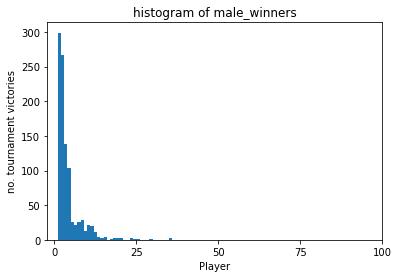

In [465]:
"""
fig,ax = plt.subplots(1,1)
ax.hist(male_winners, bins = range(1,65))
ax.set_title("histogram of male_winners")
ax.set_xticks([0,25,50,75,100])
ax.set_xlabel('Player')
ax.set_ylabel('no. tournament victories')
plt.show()
"""

In [471]:
m_w_four_winners= np.array(m_w.tolist())[0:4].sum()
f_w_four_winners= np.array(f_w.tolist())[0:4].sum()

In [472]:
m_w_four_winners

807

In [473]:
f_w_four_winners

673

In [474]:
stability_in_mens_game = (m_w_four_winners - f_w_four_winners)/1000

In [475]:
stability_in_mens_game

0.134

In [476]:
#a player among the top 4 male players is 13.4% more likely to win a tournament than the top 4 female player from identical pool 

In [478]:
stability=[]
for k in range(100):
    male_winners= []
    for i in range(100):
        male_winners.append(tournament_winner(players_dataframe,'m'))
        if i%50 == 0:
            print(i)
    female_winners= []
    for i in range(100):
        female_winners.append(tournament_winner(players_dataframe,'f'))
        if i%50 == 0:
            print(i)
    male_winners= np.array(male_winners)
    female_winners= np.array(female_winners)
    m_w=pd.Series(male_winners).value_counts()
    f_w=pd.Series(female_winners).value_counts()
    m_w_four_winners= np.array(m_w.tolist())[0:4].sum()
    if k%10 == 0:
        print('{} done'.format(k))
    f_w_four_winners= np.array(f_w.tolist())[0:4].sum()
    stability_in_mens_game = (m_w_four_winners - f_w_four_winners)/100
    stability.append(stability_in_mens_game)

0
50
0
50
0 done
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
10 done
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
20 done
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
30 done
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
40 done
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
50 done
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
60 done
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
70 done
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
80 done
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
0
50
90 done
0
50
0
50
0

In [481]:
stability

[0.12,
 0.05,
 0.1,
 0.1,
 0.08,
 0.15,
 0.09,
 0.15,
 0.04,
 0.06,
 0.03,
 0.08,
 0.14,
 0.15,
 0.06,
 0.08,
 0.05,
 0.06,
 0.05,
 0.01,
 0.02,
 0.11,
 0.04,
 0.15,
 0.06,
 0.12,
 0.1,
 0.07,
 0.15,
 0.13,
 0.03,
 0.07,
 0.11,
 0.09,
 0.09,
 0.1,
 -0.03,
 0.12,
 0.2,
 0.14,
 0.04,
 0.03,
 0.02,
 0.11,
 0.16,
 0.16,
 0.02,
 0.08,
 0.14,
 0.05,
 0.08,
 0.05,
 0.09,
 0.11,
 0.15,
 0.06,
 0.05,
 -0.04,
 0.2,
 0.04,
 0.14,
 0.1,
 0.16,
 0.14,
 0.13,
 0.06,
 0.03,
 0.12,
 0.07,
 0.08,
 0.07,
 0.16,
 -0.02,
 0.19,
 0.1,
 0.23,
 0.02,
 0.08,
 -0.02,
 0.13,
 0.04,
 0.14,
 0.01,
 0.14,
 0.15,
 0.02,
 0.05,
 0.04,
 0.09,
 0.14,
 0.14,
 0.07,
 0.13,
 0.09,
 0.16,
 0.17,
 0.11,
 0.1,
 0.18,
 0.13]

<AxesSubplot:>

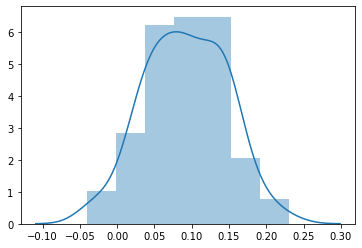

In [482]:
sns.distplot(stability)

In [483]:
from scipy.stats import norm

mu, std = norm.fit(stability)

u_l = mu + 2* std
l_l = mu - 2* std


In [484]:
l_l

-0.01690055146919063

In [487]:
z= (0-mu)/std

In [493]:
import scipy
p_values = 1- scipy.special.ndtr(z)

In [494]:
p_values

0.9544218649849308

In [ ]:
# 95.44% of times male top player pool has an advantage over female top player pool

In [72]:
x= list(range(-10,10))

In [73]:
x

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [74]:
y=[(-1)**(1/xi) for xi in x if xi != 0]
y

[(0.9510565162951535-0.3090169943749474j),
 (0.9396926207859084-0.3420201433256687j),
 (0.9238795325112867-0.3826834323650898j),
 (0.9009688679024191-0.4338837391175581j),
 (0.8660254037844387-0.49999999999999994j),
 (0.8090169943749475-0.5877852522924731j),
 (0.7071067811865476-0.7071067811865476j),
 (0.5000000000000001-0.8660254037844386j),
 (6.123233995736766e-17-1j),
 -1.0,
 -1.0,
 (6.123233995736766e-17+1j),
 (0.5000000000000001+0.8660254037844386j),
 (0.7071067811865476+0.7071067811865476j),
 (0.8090169943749475+0.5877852522924731j),
 (0.8660254037844387+0.49999999999999994j),
 (0.9009688679024191+0.4338837391175581j),
 (0.9238795325112867+0.3826834323650898j),
 (0.9396926207859084+0.3420201433256687j)]

In [75]:
5**y[0]

(4.061404130920405-2.2047672377933516j)

In [76]:
import math
math.e**y[0]

(2.4658361290205706-0.7872033259673807j)